In [1]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
def show(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### 直方图
![title](img/hist_1.png)

#### cv2.calcHist(images,channels,mask,histSize,ranges)

- images: 原图像图像格式为 uint8 或 ﬂoat32。当传入函数时应 用中括号 [] 括来例如[img]
- channels: 同样用中括号括来它会告函数我们统幅图 像的直方图。如果入图像是灰度图它的值就是 [0]如果是彩色图像 的传入的参数可以是 [0][1][2] 它们分别对应着 BGR。 
- mask: 掩模图像。统整幅图像的直方图就把它为 None。但是如 果你想统图像某一分的直方图的你就制作一个掩模图像并 使用它。
- histSize:BIN 的数目。也应用中括号括来
- ranges: 像素值范围常为 [0256] 

In [3]:
img=cv2.imread('img/cat.jpg',0)
hist=cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

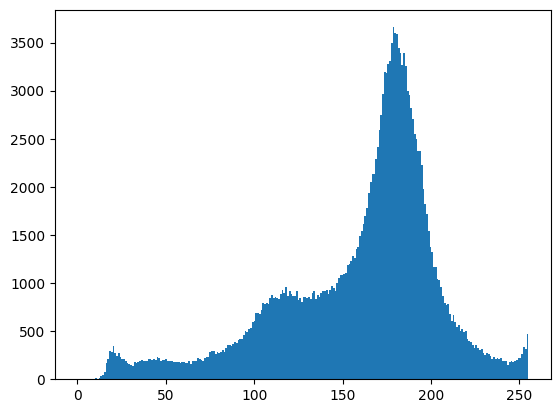

In [4]:
#ravel 表示平铺 256表示像素值范围
plt.hist(img.ravel(),256)
plt.show()

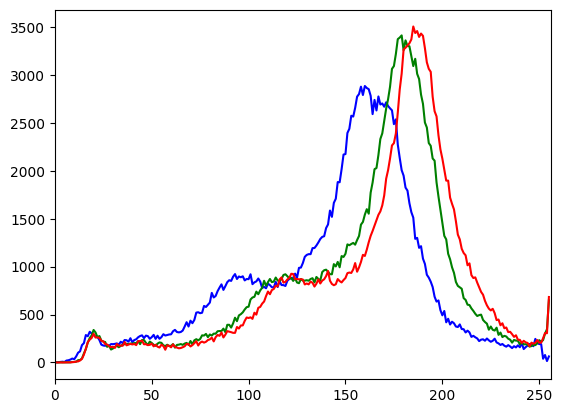

In [7]:
img=cv2.imread('img/cat.jpg')
color=('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

mask操作

In [15]:
#创建mast
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300,100:400]=255
show(mask)

In [29]:
img=cv2.imread('img/cat.jpg',0)
show(img)

In [18]:
#与操作 相同
mask_img=cv2.bitwise_and(img,img,mask=mask)
show(mask_img)

In [21]:
hist_full=cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask=cv2.calcHist([img],[0],mask,[256],[0,256])

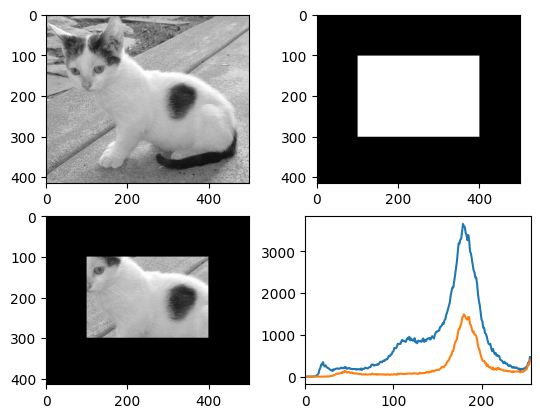

In [28]:
plt.subplot(221), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(222),plt.imshow(mask,'gray')
plt.subplot(223),plt.imshow(mask_img,'gray')
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#### 直方图均衡化

![title](img/hist_2.png)

![title](img/hist_3.png)


![title](img/hist_4.png)

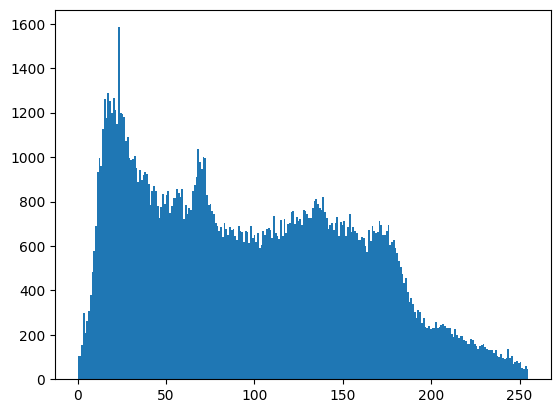

In [31]:
img=cv2.imread('img/clahe.jpg',0)
plt.hist(img.ravel(),256)
plt.show()

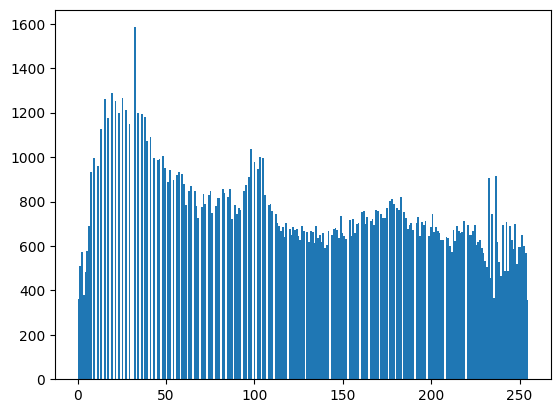

In [33]:
equ=cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()

In [35]:
res=np.hstack((img,equ))
show(res)

In [36]:
#自适应直方图均衡化
#clipLimit=2.0：限制局部对比度增强的强度（推荐值 1.0~3.0）。
#tileGridSize=(8, 8)：将图像划分为 8x8 的小块独立处理。

clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [38]:
res_clahe=clahe.apply(img)
res=np.hstack((img,equ,res_clahe))
show(res)

### 模板匹配

模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [39]:
#模板匹配
img=cv2.imread('img/lena.jpg',0)
template=cv2.imread('img/face.jpg',0)
h,w=template.shape[:2]

In [41]:
img.shape

(263, 263)

In [42]:
template.shape

(110, 85)

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关

公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [47]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [43]:
res=cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
res.shape

(154, 179)

In [44]:
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)

In [45]:
print(min_val,max_val,min_loc,max_loc)

39168.0 74403584.0 (107, 89) (159, 62)


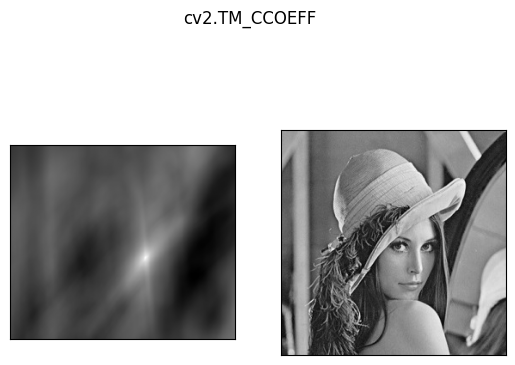

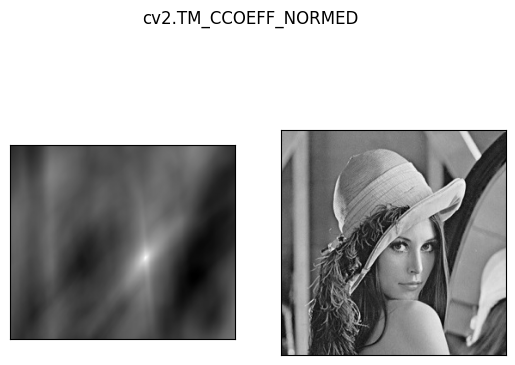

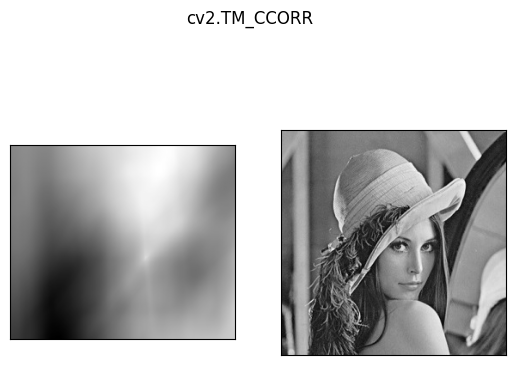

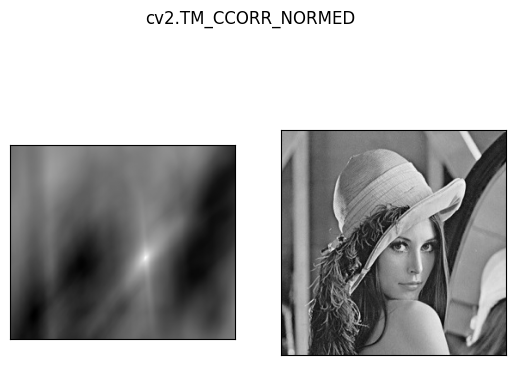

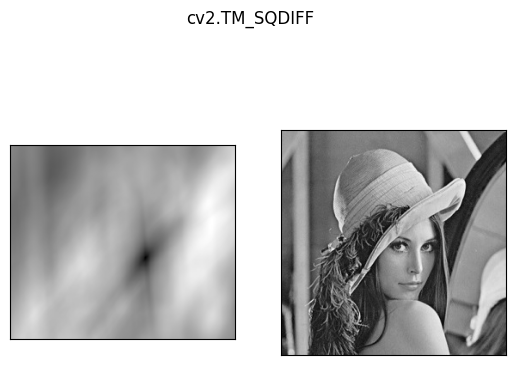

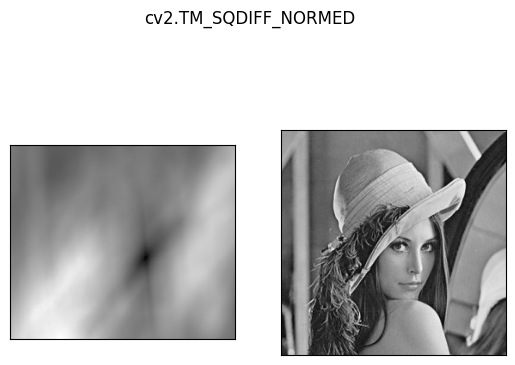

In [52]:
for meth in methods:
    img2=img.copy()
    #不能传字符串
    method=eval(meth)
    res=cv2.matchTemplate(img2,template,method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值的坐标
    if meth in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    bottom_right=(top_left[0]+w,top_left[1]+h)
    #画矩形
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### 匹配多个对象

In [58]:
img_rgb=cv2.imread('img/mario.jpg')
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
template =cv2.imread('img/mario_coin.jpg',0)
h,w=template.shape[:2]
res=cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(res)
threshold=0.8 #阈值，大于这个阈值的都为匹配到的
loc=np.where(res>=threshold)
for pt in zip(*loc[::-1]):
    bottom_right=(pt[0]+w,pt[1]+h)
    cv2.rectangle(img_rgb,pt,bottom_right,(0,0,255),2)

show(img_rgb)

[[ 0.18243185  0.23490407  0.2738369  ...  0.14377648  0.23237115
   0.29920125]
 [ 0.13521615  0.18903284  0.2277196  ...  0.14376234  0.23242038
   0.2993347 ]
 [ 0.1172208   0.16913423  0.20982653 ...  0.1437274   0.23242891
   0.29881662]
 ...
 [-0.04517262 -0.00728449  0.01348722 ...  0.0583136   0.00654248
   0.01802466]
 [-0.03518109 -0.00539084  0.01262312 ...  0.06492698  0.01110284
   0.0345186 ]
 [-0.00769067  0.02791034  0.04187294 ...  0.09367714  0.05055452
   0.07471332]]


In [59]:
import numpy as np

# 模拟 np.where 的结果
res = np.array([[0.9, 0.2], [0.85, 0.1]])
threshold = 0.8
loc = np.where(res >= threshold)

print("原始 loc:", loc)
print("反转后的 loc:", loc[::-1])

原始 loc: (array([0, 1]), array([0, 0]))
反转后的 loc: (array([0, 0]), array([0, 1]))
